## <b> <font color='Purple'> Parte 6: Gráfica de Barras

In [1]:
using CairoMakie
using XLSX
using DataFrames
using LaTeXStrings

### <b> 1. Importar Datos de Excel

In [2]:
# Leer los datos desde el archivo Excel
Data = XLSX.readxlsx("00.xlsx")
;

Guardar los datos:

In [3]:
#Definir nombre de barras (filas)
Name_Barras = vec(Array{String}(Data["02"]["A2:A16"]))

#Definir nombre de grupos (columnas)
Name_Grup = vec(Array{String}(Data["02"]["B1:I1"]))

# Definir la matriz
Graph_1 = Array{Float64}(coalesce.(Data["02"]["B2:I16"], 0.0))

15×8 Matrix{Float64}:
 2394.14      0.0       0.0       0.0        0.0       0.0      0.0      0.0
  961.095     0.0       0.0       0.0        0.0       0.0      0.0      0.0
 1149.12      0.0       0.0       0.0        0.0       0.0      0.0      0.0
  395.641  2239.35   1841.33      0.0        0.0       0.0      0.0      0.0
    0.0    2010.96      0.0       0.0        0.0       0.0      0.0      0.0
    0.0     649.693     0.0       0.0        0.0       0.0      0.0      0.0
    0.0       0.0     785.232     0.0        0.0       0.0      0.0      0.0
    0.0       0.0       0.0       0.0        0.0       0.0   1819.44     0.0
    0.0       0.0       0.0       0.0     2926.15      0.0      0.0      0.0
    0.0       0.0       0.0    2830.55      78.728   181.19     0.0      0.0
    0.0       0.0       0.0       0.0        0.0    1939.2      0.0      0.0
    0.0       0.0       0.0      84.9044     0.0       0.0    683.56     0.0
    0.0       0.0       0.0       0.0        0.0      

In [4]:
#Definir tamaño de la matriz
n = size(Graph_1, 1)
m = size(Graph_1, 2)

# Obtener el vector con todos los valores
valor = vec(Graph_1)

# Obtener el vector de columnas
columna = repeat(1:m, inner=n)

# Obtener el vector de filas
fila = repeat(1:n, m)
;

* Crear grafica:

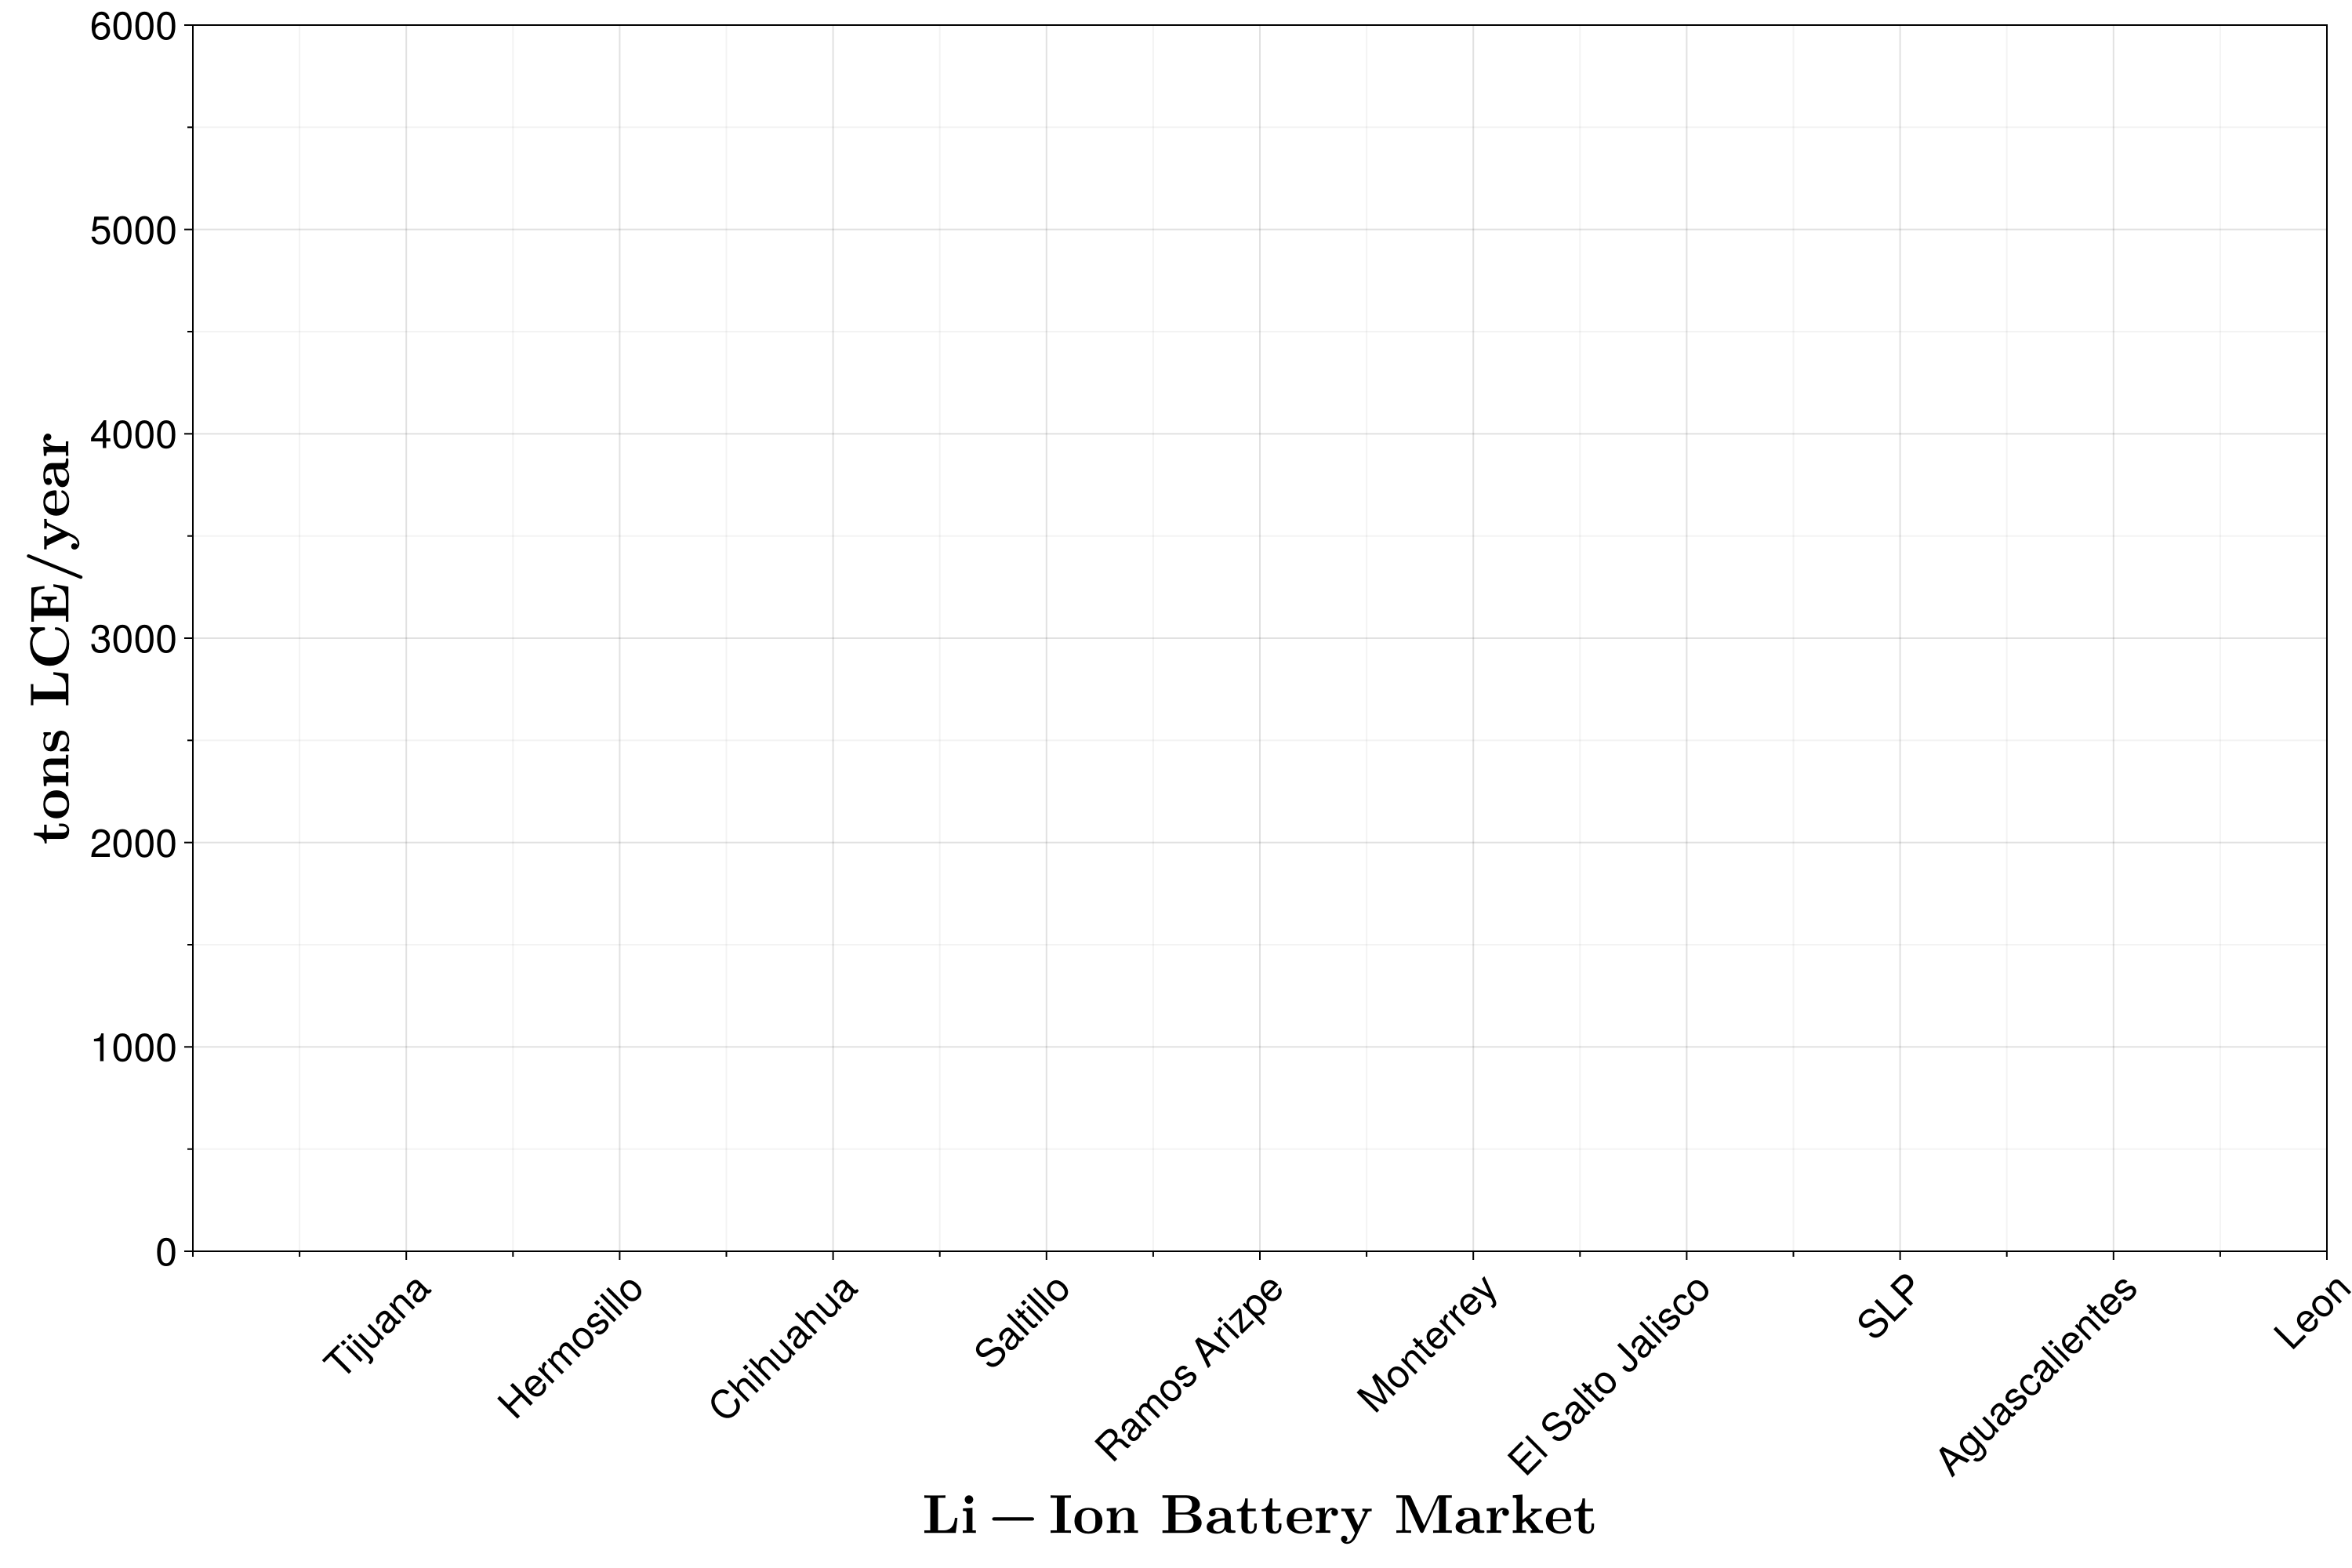

In [5]:
# Figure and Axis
fig = Figure(; size=(1500, 1000))

ax = Axis(
    fig[1, 1];
    xticks=(1:length(Name_Barras), Name_Barras),
    xticklabelrotation=pi / 4,
    yticks=0:1000:6000,
    limits=(nothing, (0, 6000)),
    xminorticksvisible=true,
    yminorticksvisible=true,
    xminorgridvisible=true,
    yminorgridvisible=true,
    #title="Dodged bars with legend"
    xlabel=L"\textbf{Li-Ion Battery Market}",
    ylabel=L"\textbf{tons LCE/year}",
    xlabelsize=35,
    ylabelsize=35,
    xticklabelsize=25,
    yticklabelsize=25,
    titlealign=:left,
    titlesize=30,
    #yticklabelcolor = :blue,
    #ylabelcolor = :red
)
fig

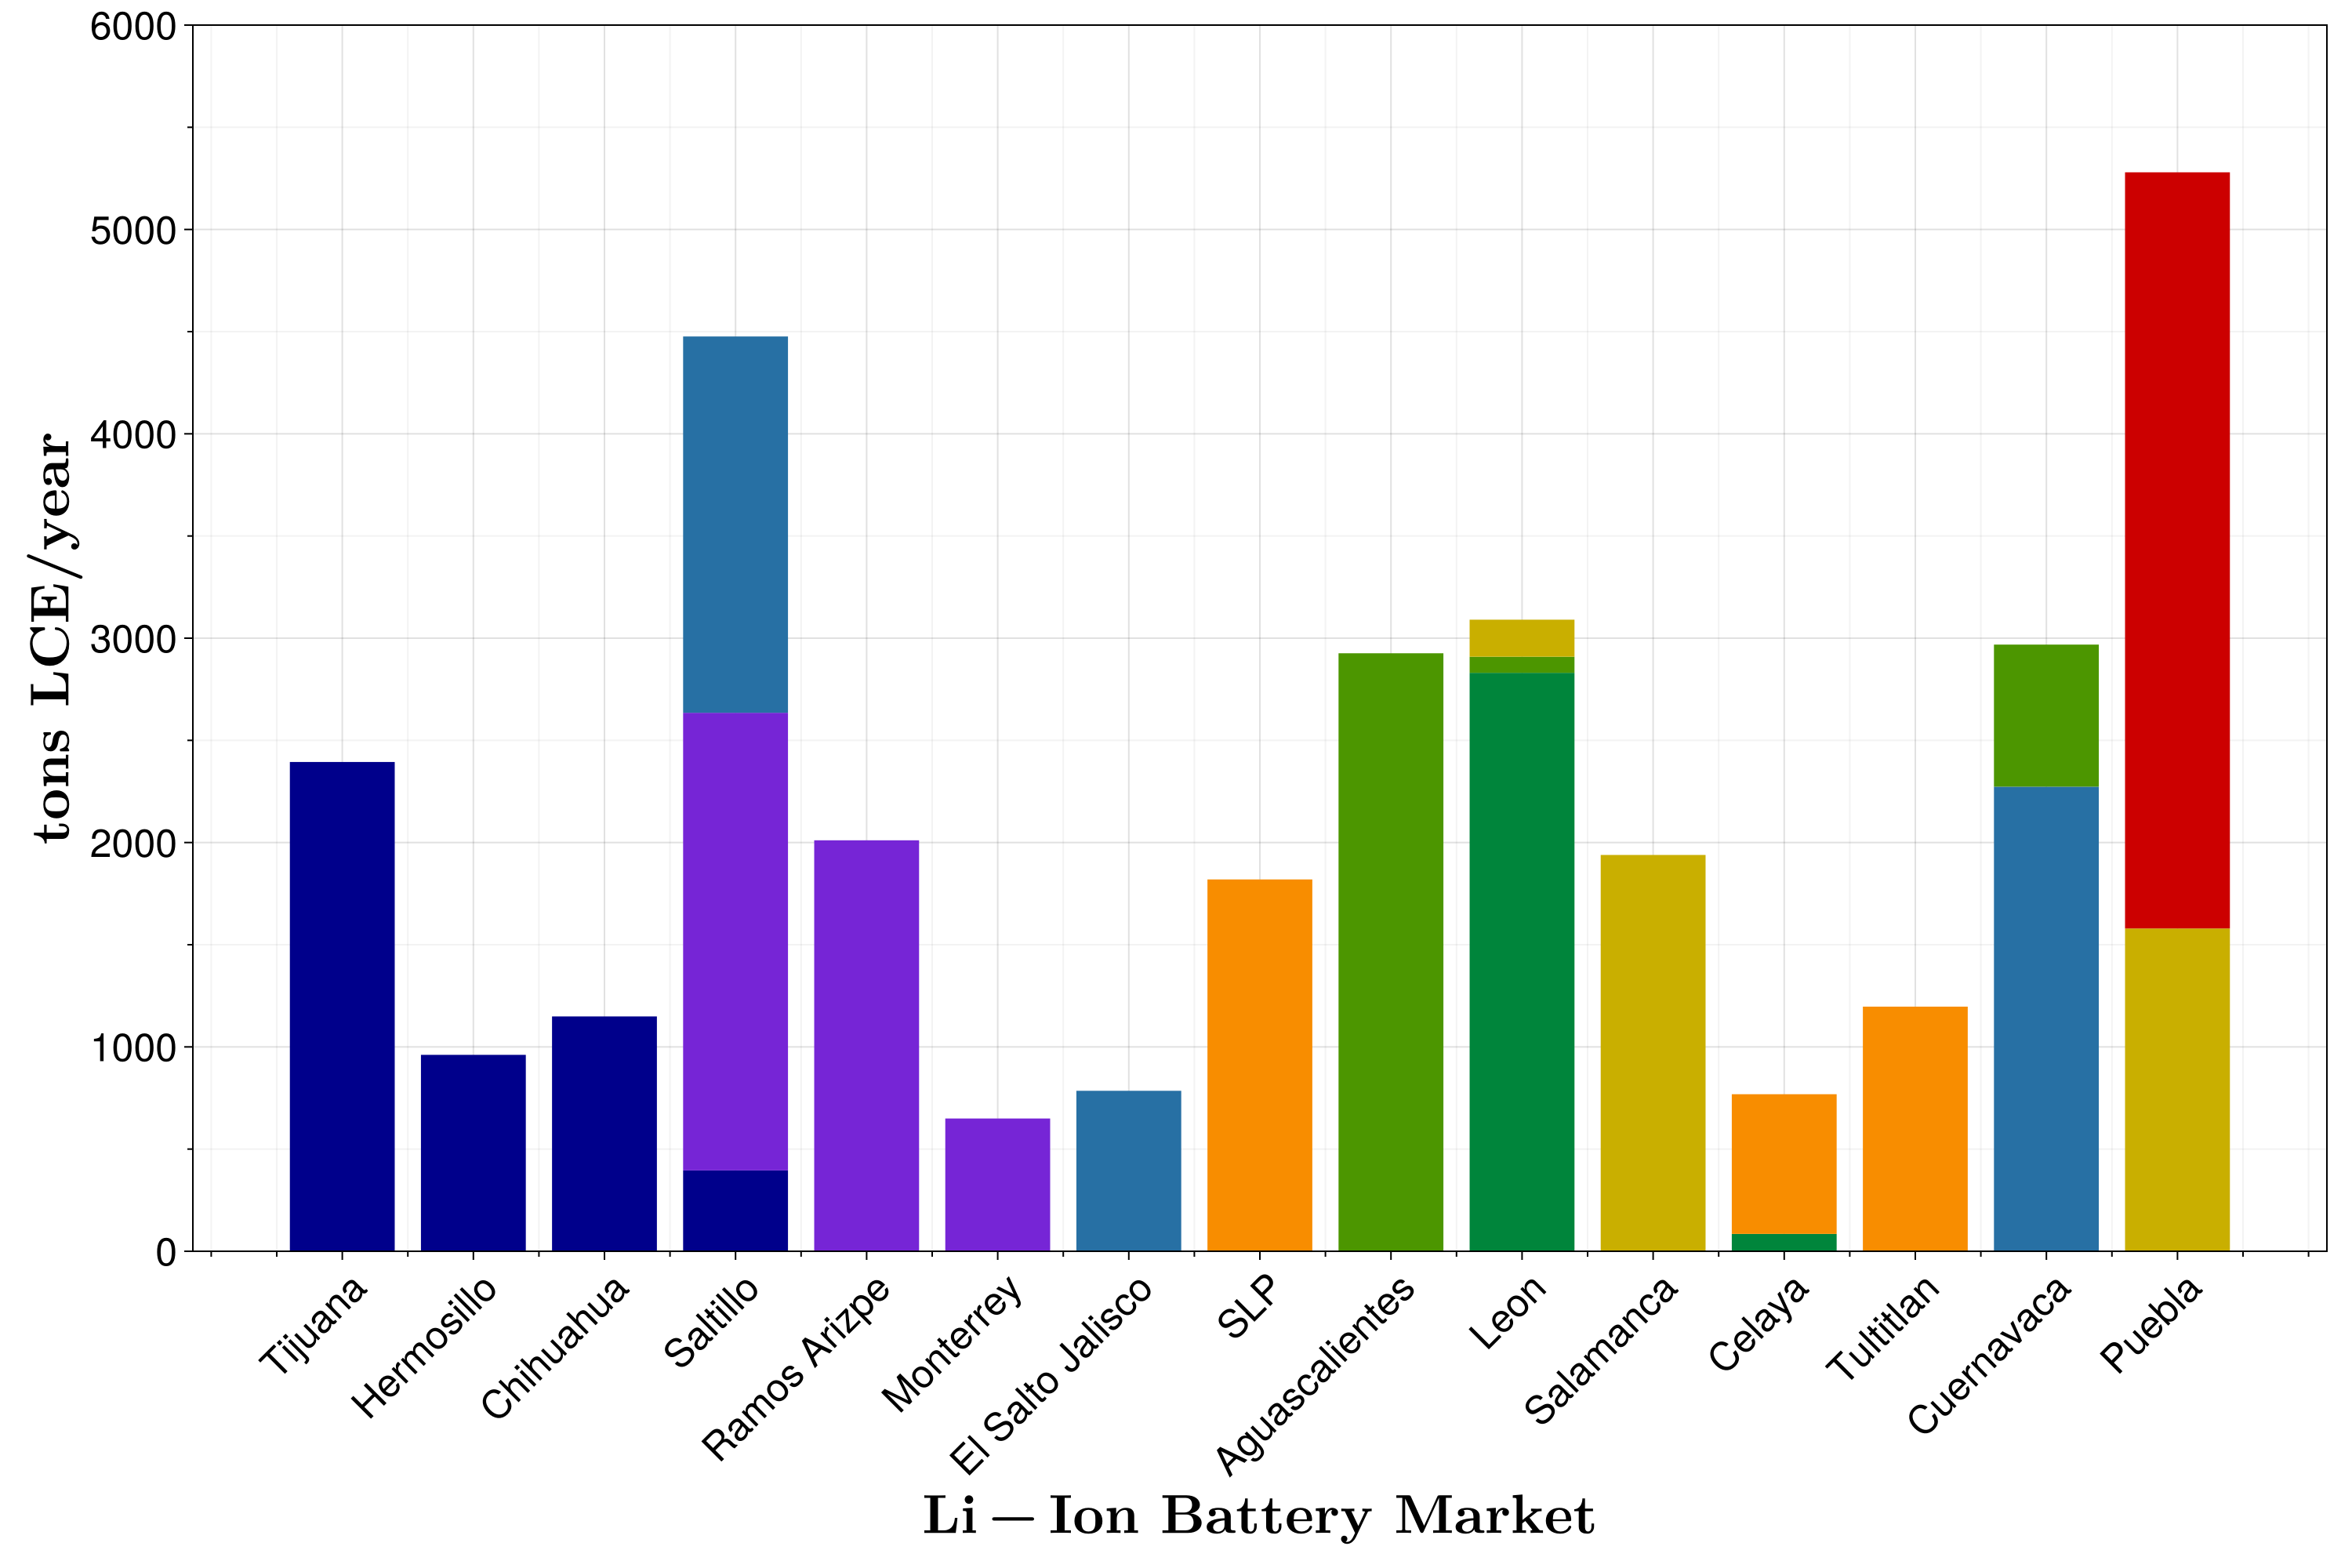

In [6]:
# Definir colores
Colors = cgrad(:darktest, m, categorical=true)[1:m]

# Plot
tbl = (cat=fila, height=valor, grp=columna)

barplot!(ax, tbl.cat, tbl.height,
    stack=tbl.grp,
    color=Colors[tbl.grp]
)
fig

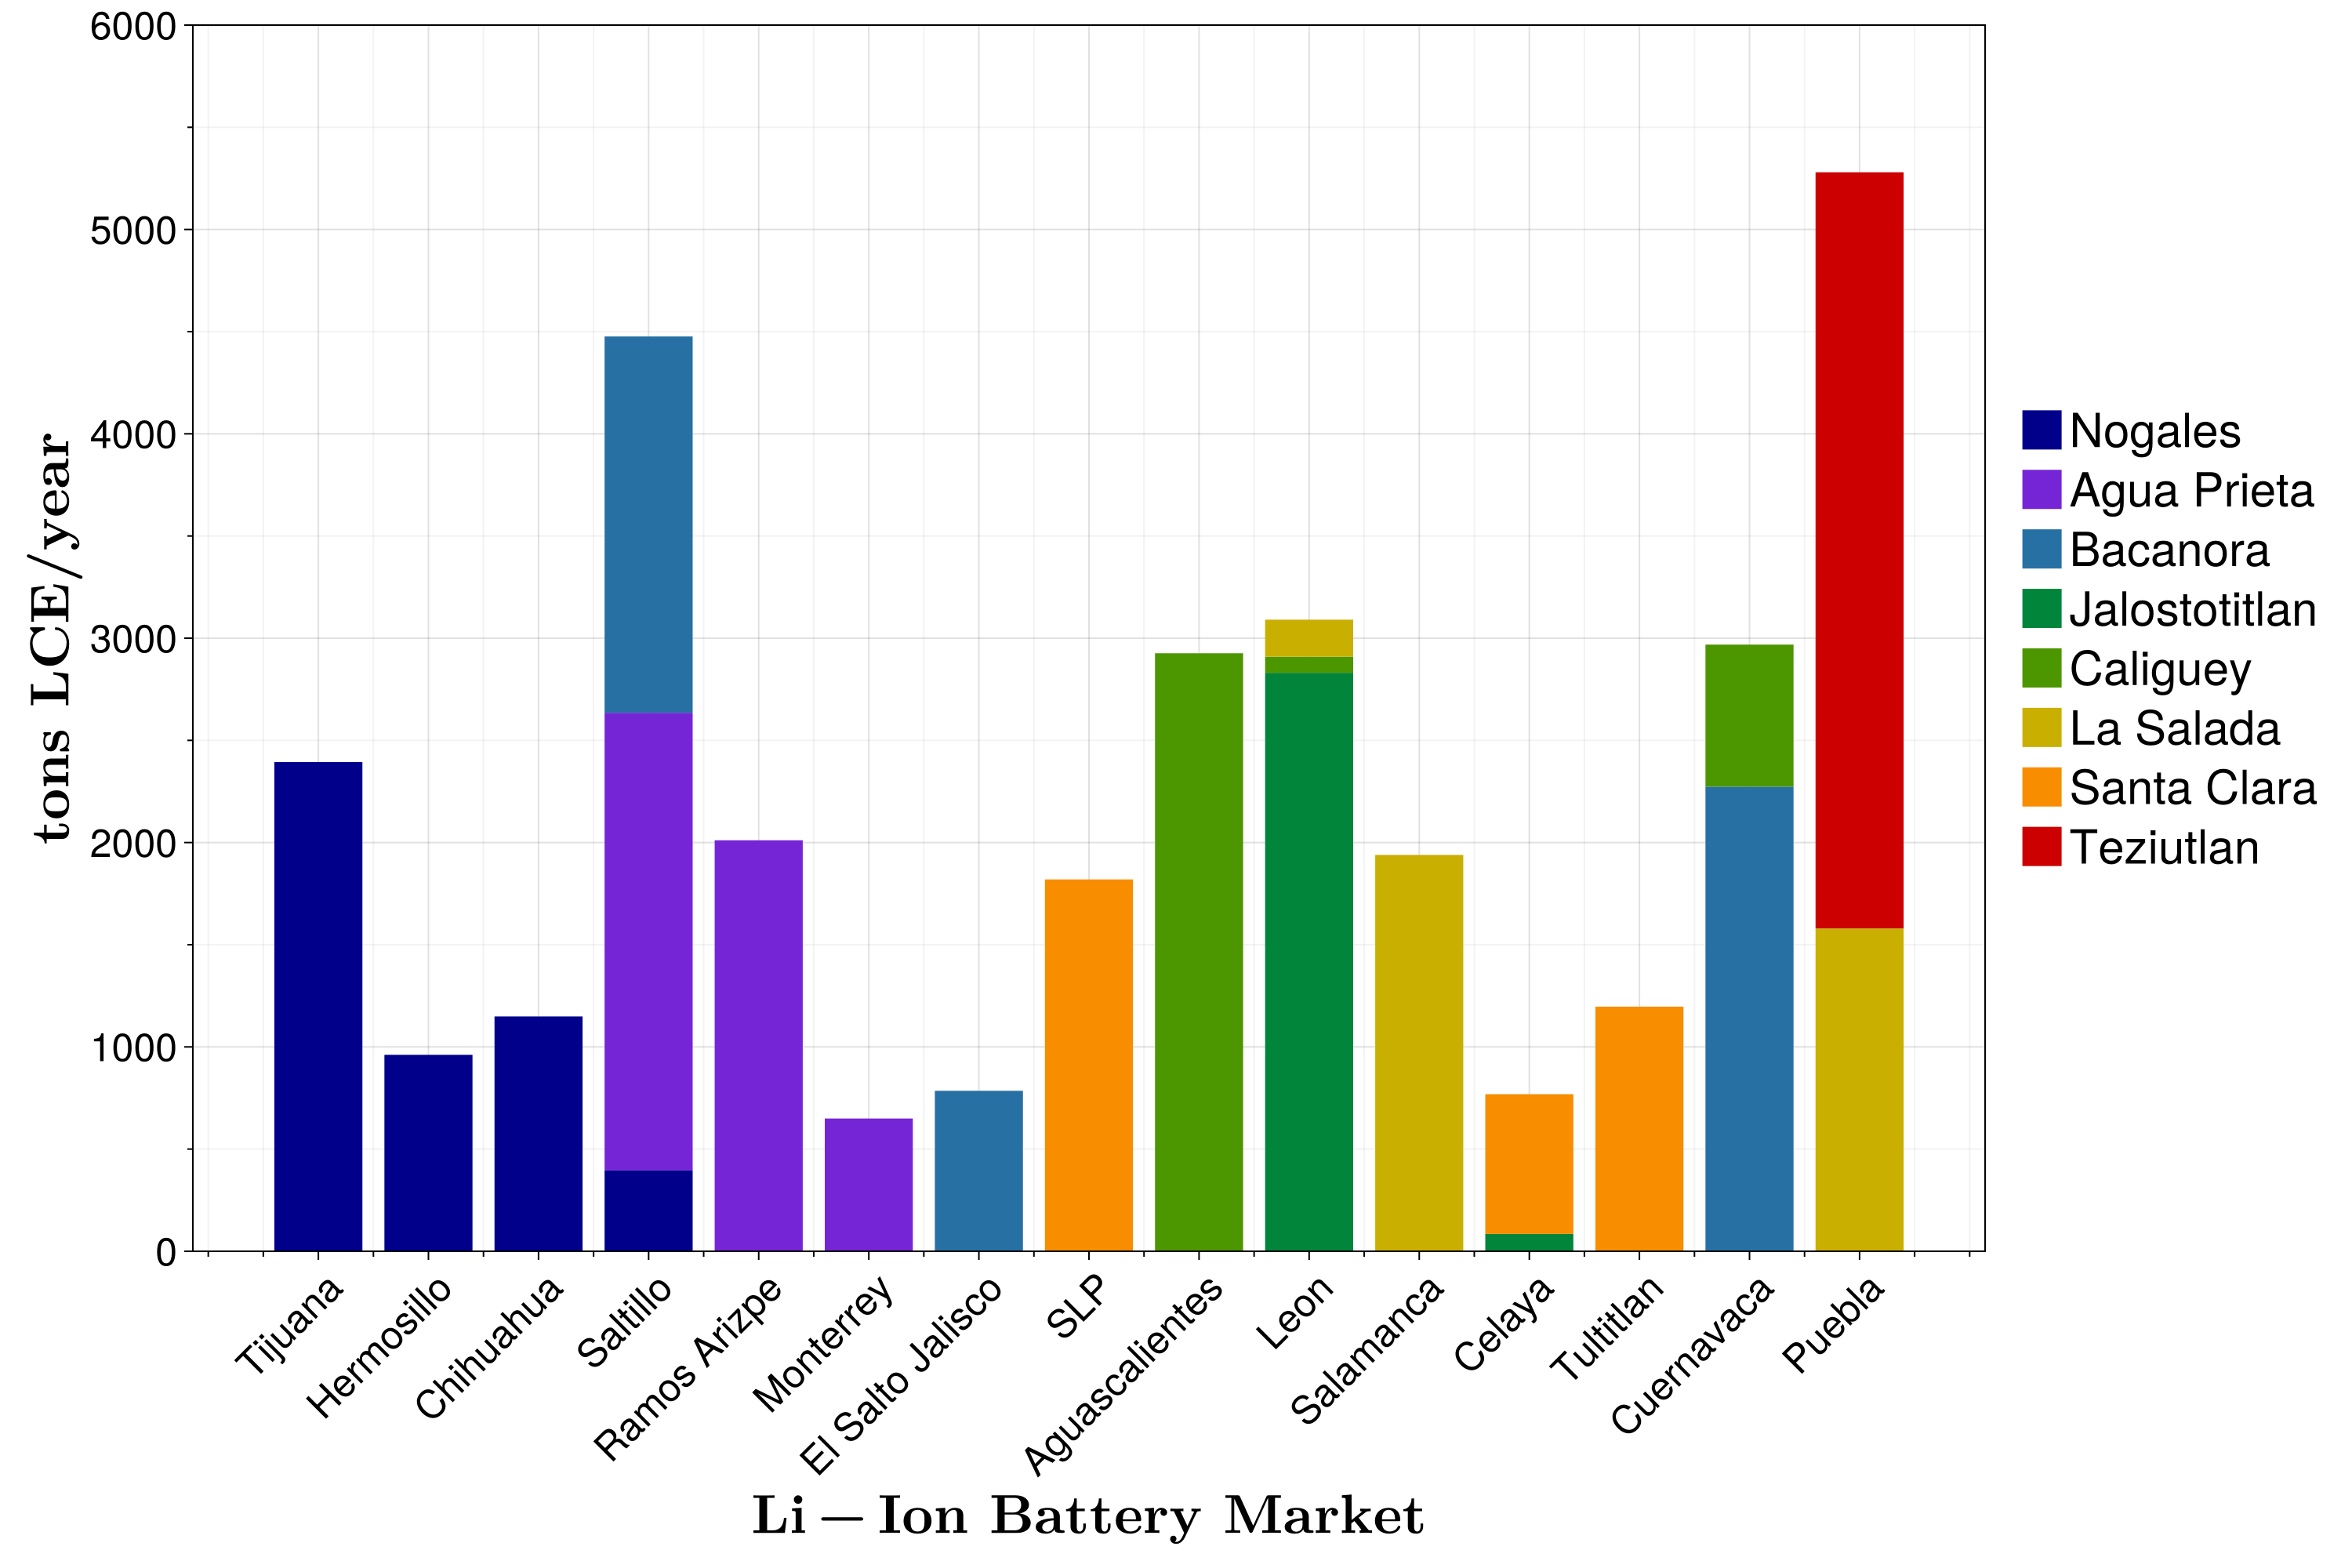

In [7]:
#Colocar la legenda de los grupos
elements = [PolyElement(polycolor=Colors[i]) for i in 1:m]
Legend(
    fig[1, 2],
    elements,
    Name_Grup,
    #title,
    titlesize=30,
    orientation=:vertical,
    labelsize=30,
    patchsize=(25, 25),
    nbanks=1,
    tellheight=false,
    tellwidth=true,
    framevisible=false
)
fig